<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

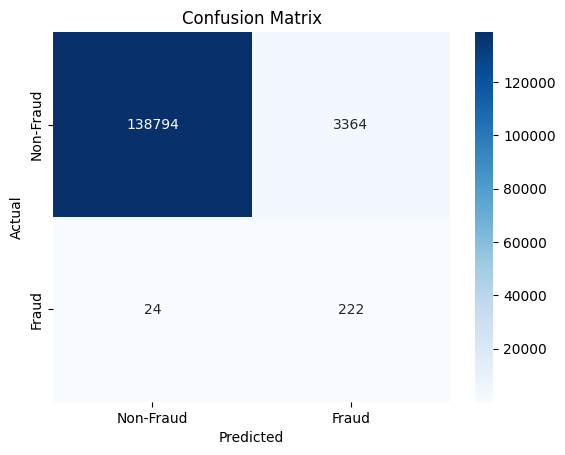

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    142158
           1       0.06      0.90      0.12       246

    accuracy                           0.98    142404
   macro avg       0.53      0.94      0.55    142404
weighted avg       1.00      0.98      0.99    142404



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset of the credit cards
data = pd.read_csv('creditcard.csv')

print(data.info())


X = data.drop(columns=['Class'])
y = data['Class']  

data.dropna(subset=['Class'], inplace=True)

X = data.drop(columns=['Class'])
y = data['Class']  

# Split the dataset into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5,random_state=42, stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Non-Fraud', 'Fraud'],
    yticklabels=['Non-Fraud', 'Fraud'],
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

